#   CAR SALE EDA PROJECT

## Contents :
- 1. [Introduction](#problem_statement)</br>
    - 1.1 [Problem Statement](#)
    - 1.2 [Data Set Description](#)
- 2. [Load the Package and Data](#package_data)</br>
- 3. [Data Profiling](#data_profiling)</br>
    - 3.1 [dtypes](#dtypes)<br/>
    - 3.2 [head](#head)<br/>
    - 3.3 [describe](#describe)<br/>
    - 3.4 [sample](#sample)<br/>
    - 3.5 [Pandas profiling](#pandas_profiling)<br/>
    - 3.6 [Observations](#observations)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Outlier Treatment](#section402)<br/>
    - 4.5 [Handling NaN](#section403)<br/>
        - 4.3.1 [Handling Nan in numerical column](#section431)<br/>
        - 4.3.2 [Handling Nan in categorical column](#section432) <br/>
- 5. [Data Analysis And Observations](#section5)</br>
    - 5.1 [Coreation between the columns](#section501)<br/>
    - 5.2 [Top 10 car whcih are sold mostly](#section502)<br/>
    - 5.3 [What do people prefer register or unregister cars](#section503)<br/>
    - 5.4 [Which type of engtype do people prefer ](#section504)<br/>
    - 5.5 [Year vs EngType](#section505)<br/>
    - 5.6 [Price vs Year](#section506)<br/>
    - 5.7 [Pattern analysis on body coulmn](#section507)<br/>
    - 5.8 [Price vs Drive over the years](#section508)<br/>
- 6. [Actionable Insights](#section6)

<a id='problem_statement'></a>

##  1. Introduction
<img src=" https://teja9.kuikr.com/cb1/reviews/Best-used-cars-for-sale_1.jpeg ">

###    1.1 Statement
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

###    1.2 Data Set Description 
- The dataset consists information collected from car sale advertisements for study/practice purpose where most of them're used cars.
- The dataset comprises of __9576 observations of 10 columns__. 
#### Some Background Information
- This data was collected from private car sale advertisements in Ukraine and provided by INSAID team to perform Exploratory Data Analysis.
- This dataset has real raw data which has all inconvenient moments (as NA’s for example).
- This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation.

<a id='package_data'></a>

###  2. Load the Package and Data

In [1]:
# ! python -m pip install --upgrade pandas matplotlib 

In [2]:
# ! python -m pip install --upgrade onnxmltools

In [3]:
# !pip install pandas_profiling 

In [4]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
car_sale_dataframe = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='latin')# Load in the dataset as car_sale_dataframe

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<a id='data_profiling'></a>

### 3. Data Profiling
Review the data types and sample data to understand what variables we are dealing with?
Which variables need to be transformed in some way before they can be analyzed?

<a id='dtypes'></a>

In [5]:
car_sale_dataframe.dtypes #show data type of column 

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id='head'></a>

In [6]:
car_sale_dataframe.head() #display 5 rows

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


<a id='describe'></a>

In [7]:
car_sale_dataframe.describe(include='all') # It describes all data information

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


<a id='pandas_profiling'></a>

In [8]:
# import pandas_profiling                                                                                        

# profile = car_sale_dataframe.profile_report() 
# profile.to_file(output_file="care_sale_profiling.html")                                # HTML file will be downloaded to your workspace

# # I was not able to do this and I shooted mail to insaid research team and got reply that due to large dataset you are not able to do it. 

<a id='observations'></a>
## Observations

- 1. drive
    - a.  There are 511 entries are missing in drive column which are essential in order to know which wheels are driven by engine. For more refernce please do go through following link :
https://en.wikipedia.org/wiki/Car_layout

- 2. engV
    - a. There are 436 entries missing in engV.
    - b. Min value of engV is 0.1 liter which is very less.
    - c. Max value is 99.99 liters which is very high.
 
- 3. price
    - a. Min value is 0 USD which mean that someone is selling car for free which wis rare scenario.
    
- 4. mileage
    - a. Considering these values in kmiles means value 5 represent 5000 miles.
    - b. Min value is 0 which means that if someone has brought the car and is selling immediately which is rare scenario.

<a id=section4></a> 
### 4. Data Normalization

<a id='section401'></a>
### 4.1. Standardize all column headers to lower case 

In [9]:
car_sale_dataframe.columns = map(str.lower, car_sale_dataframe.columns)  # map() function returns a list of results after applying the given function
car_sale_dataframe.dtypes                               # to each item of a given iterable.       

car              object
price           float64
body             object
mileage           int64
engv            float64
engtype          object
registration     object
year              int64
model            object
drive            object
dtype: object

- __duplicates__: As there are __113__ duplicate rows in dataset, we have to remove those first.

In [10]:
car_sale_dataframe.drop_duplicates(inplace=True) #inplace used to modify the dataset with applied command
car_sale_dataframe.shape

(9463, 10)

<a id=section402></a> 
### 4.2. Outliers Treatment

__engv__ - In data profiling we saw the min value is 0.1 and max is 99.99 . Here we are considering the value as range as 0.5 to 10 liters. There are 123 entries so we are replacing the entries with NaN

In [11]:
 car_sale_dataframe.loc[(car_sale_dataframe['engv'] < 1) | (car_sale_dataframe['engv']>10) ]['engv'].count() #There are 123 outliers in the dataset

123

In [12]:
car_sale_dataframe['engv'] = car_sale_dataframe['engv'].apply( lambda engv: np.nan if  engv < 1 or engv > 10 else engv)

In [13]:
car_sale_dataframe.loc[(car_sale_dataframe['engv'] < 1) | (car_sale_dataframe['engv']>10) ]['engv'].count() #After replacing o outliers

0

- __engtype__ : As mentioned in the data set description 'others' should be treated as NAN
- __price__ has __267__ zeros which should be treated as missing values. So we'll be replacing those to __NaN__
- __mileage__ has __348__ zeros which should be treated as missing values. So we'll be replacing those to __NaN__

In [14]:
car_sale_dataframe.replace({'engtype': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)

<a id=section403></a> 
## 4.3 Handling NaN data

In [15]:
car_sale_dataframe.isnull().sum()

car               0
price           240
body              0
mileage         310
engv            557
engtype         462
registration      0
year              0
model             0
drive           510
dtype: int64

<a id=section431></a> 
### Handling the Numerical Data

- For __numerical columns__ like price,mileage and engv we are replacing these values with __median__

In [16]:
def get_engv_median(arg):
    """
        arguments : arg
            arg datatype: series 
            arg         : it contains the eng volue grouped by car and model for.e.g ('Acura', 'MDX') [3.7 3.5 3.5 3.7 3.7]
            description : get the median value of eng volume based on car name mad model
    """
    car_brand = arg.name[0]
    if arg.count() > 0:
        return arg.median()  #If the eng volume count is present after  grouping return the median
    else:
        return car_sale_dataframe['engv'].median() # if data is missing than retrun the median of eng volume
    
def get_price_median(arg):
    """
        arguments : arg
            arg datatype: series 
            arg         : it contains the price grouped by car and model for.e.g ('Acura', 'MDX') [5000,1231243,32134234,31234]
            description : get the median value of eng volume based on car name mad model
    """
    car_brand = arg.name[0]
    if arg.count() > 0:
        return arg.median()  #If the price count is present after  grouping return the median
    else:
        return car_sale_dataframe['price'].median() # if data is missing than retrun the median of price

def get_mileage_median(arg):
    """
        arguments : arg
            arg datatype: series 
            arg         : it contains the mileage grouped by car and model for.e.g ('Acura', 'MDX') [114,113,123,444]
            description : get the median value of eng volume based on car name mad model
    """
    car_brand = arg.name[0]
    if arg.count() > 0:
        return arg.median()  #If the mileage count is present after  grouping return the median
    else:
        return car_sale_dataframe['mileage'].median() # if data is missing than retrun the median of mileage

engv_meadians = car_sale_dataframe.groupby(['car','model'])['engv'].apply(get_engv_median).reset_index()
engv_meadians.rename(columns={'engv': 'engv_med'}, inplace=True)

price_meadians = car_sale_dataframe.groupby(['car','model'])['price'].apply(get_price_median).reset_index()
price_meadians.rename(columns={'price': 'price_med'}, inplace=True)

mileage_meadians = car_sale_dataframe.groupby(['car','model'])['mileage'].apply(get_mileage_median).reset_index()
mileage_meadians.rename(columns={'mileage': 'mileage_med'}, inplace=True)

In [17]:
def engv_nan_handler(arg):
    """
        arguments : 
            arg = each row from the dataframe
        description: to replace the nan with the median we created
    """
    
    if pd.isnull(arg['engv']):
        return engv_meadians[(engv_meadians['car'] == arg['car']) & (engv_meadians['model'] == arg['model'])]['engv_med'].values[0]  # retrun the value from the engv_meadians dataframe based on car and model
    else:
        return arg['engv'] # return orignal value
    
def price_nan_handler(arg):
    """
        arguments : 
            arg = each row from the dataframe
        description: to replace the nan with the median we created
    """
    
    if pd.isnull(arg['price']):
        return price_meadians[(price_meadians['car'] == arg['car']) & (price_meadians['model'] == arg['model'])]['price_med'].values[0]  # retrun the value from the engv_meadians dataframe based on car and model
    else:
        return arg['price'] # return orignal value
    
def mileage_nan_handler(arg):
    """
        arguments : 
            arg = each row from the dataframe
        description: to replace the nan with the median we created
    """
    
    if pd.isnull(arg['mileage']):
        return mileage_meadians[(mileage_meadians['car'] == arg['car']) & (mileage_meadians['model'] == arg['model'])]['mileage_med'].values[0]  # retrun the value from the engv_meadians dataframe based on car and model
    else:
        return arg['mileage'] # return orignal value

        
car_sale_dataframe['engv'] = car_sale_dataframe.apply(engv_nan_handler,axis=1)
car_sale_dataframe['price'] = car_sale_dataframe.apply(price_nan_handler,axis=1)
car_sale_dataframe['mileage'] = car_sale_dataframe.apply(mileage_nan_handler,axis=1)

In [18]:
car_sale_dataframe.isnull().sum()

car               0
price             0
body              0
mileage           0
engv              0
engtype         462
registration      0
year              0
model             0
drive           510
dtype: int64

<a id=section432></a> 
### Handling NAN of categorical columns

- For __categorical columns__ like engtype and drive we are replacing it with __mode__

In [19]:
drive_mode = car_sale_dataframe.groupby(['car','model'])['drive'].apply(
    lambda arg : arg.mode() if arg.count() > 0 else   car_sale_dataframe['drive'].mode()
    ).reset_index().drop('level_2', axis=1)

drive_mode.rename(columns={'drive': 'drive_med'}, inplace=True)
    
engtype_mode = car_sale_dataframe.groupby(['car','model'])['engtype'].apply(
    lambda arg : arg.mode() if arg.count() > 0 else   car_sale_dataframe['engtype'].mode()
    ).reset_index().drop('level_2', axis=1)

engtype_mode.rename(columns={'engtype': 'engtype_med'}, inplace=True)

In [20]:
car_sale_dataframe ['drive'] = car_sale_dataframe.apply(
    lambda arg : drive_mode[(drive_mode['car'] == arg['car']) & (drive_mode['model'] == arg['model'])]['drive_med'].values[0]  
    if pd.isnull(arg['drive'])
    else arg['drive'] ,axis=1)

car_sale_dataframe ['engtype'] = car_sale_dataframe.apply(
    lambda arg : engtype_mode[(engtype_mode['car'] == arg['car']) & (engtype_mode['model'] == arg['model'])]['engtype_med'].values[0]  
    if pd.isnull(arg['engtype'])
    else arg['engtype'] ,axis=1)

In [21]:
car_sale_dataframe.isnull().sum()

car             0
price           0
body            0
mileage         0
engv            0
engtype         0
registration    0
year            0
model           0
drive           0
dtype: int64

<a id=section5></a> 

## 5  Data Analysis And Observations

<a id=section501></a> 
### 5.1 Correation betwween the columns

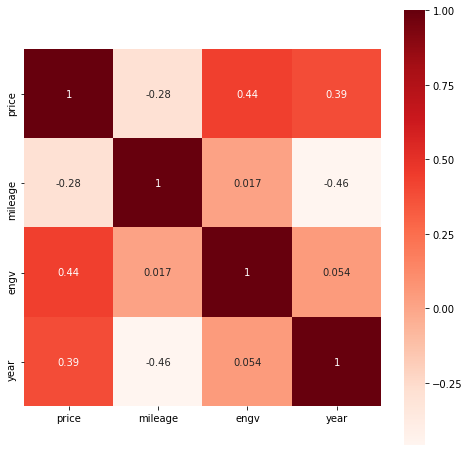

In [44]:
features_correlation = car_sale_dataframe.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1, square=True,annot=True,cmap='Reds')
plt.show()

From the obove coreation it is clear that __year and price are more closely corelated__ that states that which increase in year price is getting increased or decreased 

<a id=section502></a> 
###  5.2 Top 10 car which are sold mostly ?

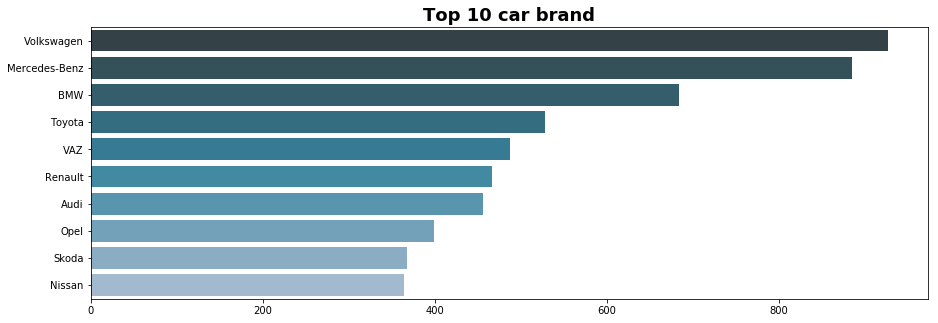

In [23]:
top_10_car_sold = car_sale_dataframe['car'].value_counts()[:10].to_frame()
plt.figure(figsize=(15,5))
sns.barplot(top_10_car_sold['car'],top_10_car_sold.index,palette="PuBuGn_d")
plt.title('Top 10 car brand',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

__Volkswagen is the most preferd car by the people__

<a id=section503></a> 
### 5.3 What do people prefer register or unregister  cars?

Text(0.5, 1.0, 'Percentage of registered snd unregistered of car sold')

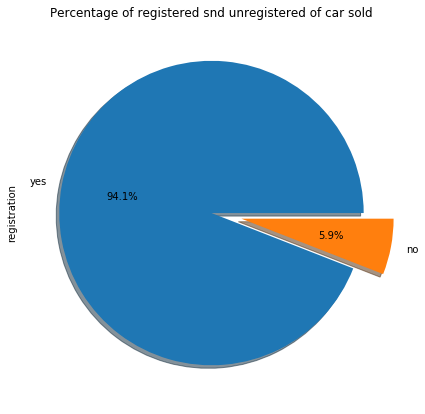

In [24]:
f,ax = plt.subplots(1,1,figsize=(22,7))
car_sale_dataframe['registration'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)
ax.set_title('Percentage of registered snd unregistered of car sold')

__Only 5.9 percent non registered car are sold. This means that most people perfer registered cars.__

#### <a id=section504></a> 
### 5.4. Which type of engtype do people prefer ?

Text(0.5, 1.0, 'Most preferred engtype used over the years')

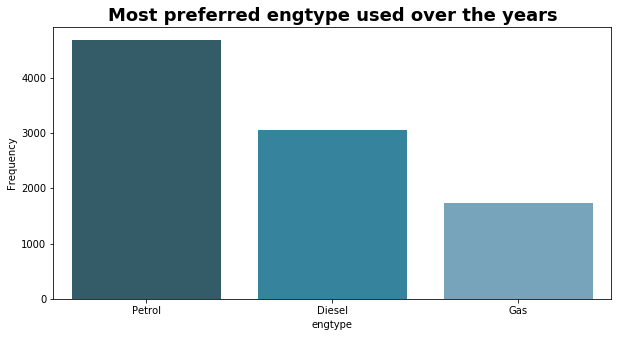

In [25]:
plt.figure(figsize=(10,5))
sns.countplot('engtype',data = car_sale_dataframe, order = car_sale_dataframe['engtype'].value_counts().index,palette="PuBuGn_d")
plt.xlabel('engtype')
plt.ylabel('Frequency')
plt.title("Most preferred engtype used over the years",fontsize=18,fontweight="bold")

__Most of the people prefer engtype as petrol then diesel and then gas.__

<a id=section505></a> 
### 5.5 Year vs EngType

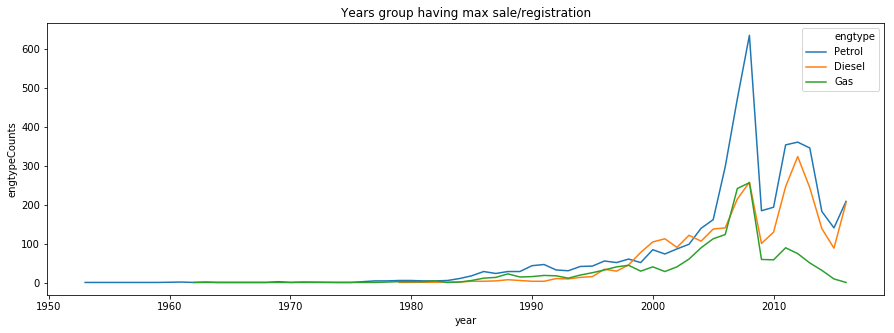

In [26]:
plt.figure(figsize=(15,5))
df = car_sale_dataframe.groupby('year')['engtype'].value_counts().sort_values(ascending=False)
df = pd.DataFrame(df)
df.rename(columns={'engtype': 'engtypeCounts'}, inplace=True)
df.reset_index(inplace=True)
sns.lineplot(data=df, x='year', y='engtypeCounts', hue='engtype')
#sns.scatterplot(data=df, x='year', y='RegCounts', hue='registration')
plt.title("Years group having max sale/registration")
df.reset_index(inplace=True)

__max number of sale of car was in year 2000-2010. The gas engtype car sale is getting decreased.__

<a id=section506></a>
### 5.6 Price vs Year 

Text(0.5, 1.0, 'Price distribution over the year w.r.t to engType')

<Figure size 1080x360 with 0 Axes>

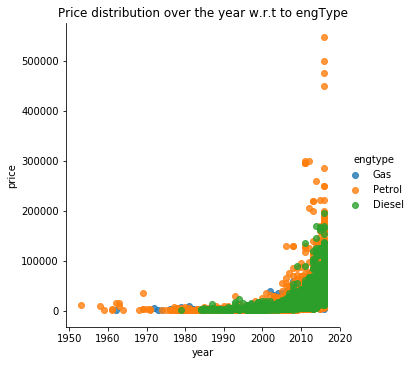

In [27]:
plt.figure(figsize=(15,5))
sns.lmplot('year','price', car_sale_dataframe, fit_reg=False, hue='engtype')
plt.title("Price distribution over the year w.r.t to engType")

 -  The above __multivariate graphs__ shows the __Price__ distribution over the years w.r.t __engType__. As the years increase, this shows there is __significant increase in prices of cars models having engine type = "Petrol"__ as compared to __"Gas" and "Diesel"__.

<a id=section507></a> 
### 5.7 pattern analysis on body coulmn

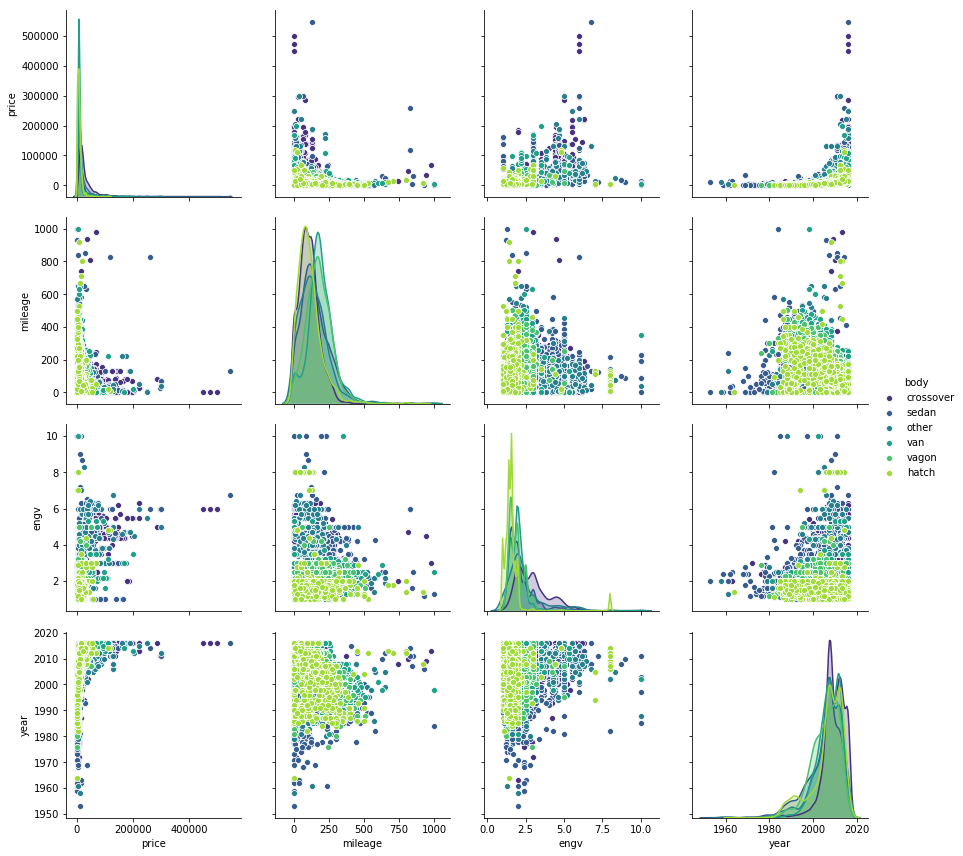

In [28]:
sns.pairplot(car_sale_dataframe, hue='body', palette="viridis", height=3)

- 1. As year increase __price of crossover and sedan car are getting increased__
- 2. __As mileage of hatch car is less it means people are selling hatch cars earlier__. 

<a id=section508></a> 
### 5.8. Price vs Drive over the years

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

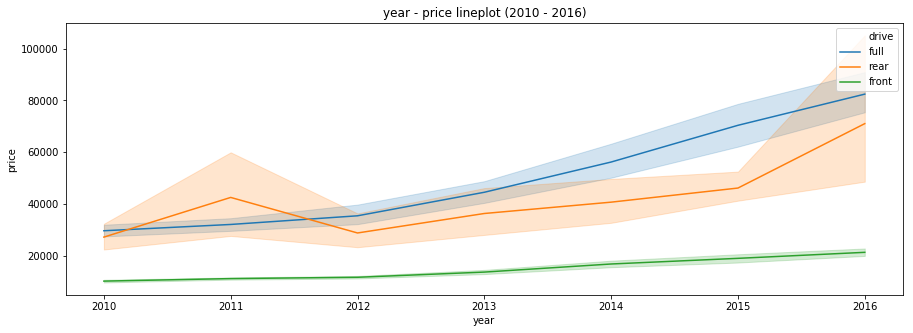

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(data=car_sale_dataframe[car_sale_dataframe.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

 - The above graphs shows the __Price__ distribution over the years (2010-2016). As the years increase, we can also see that __price of fully and rare wheeled engine is increasing expoentially.__

<a id=section6></a>
### Actionable Insights

- 1. Most of the people prefer Volkswagen car so sales team would show customer to Volkswagen car first.(__from section 5.1__) 
- 2. Most of the people prefer registered car. So purchasing team can buy most of register cars. (__from section 5.2__)
- 3. As per current trending petrol and diesel car are mostly sold. And we also observed that people are trying to avoid gas cars. So purchasing team should avoid buying gas type cars(__from section 5.3 and section 5.4__)  
- 4. Price of petrol car is increasing  rapidly over the years. Sales team should prefer selling petrol cars to higher profile people. (__from section 5.5__)
- 5. People are selling hatch are earlier. It means people are not liking the hatch body car.Which will help sales and purchase team to decide the priority.(__from section 5.6__ ) 
- 6. Price of rare and fully drive car is increasing rapidly. Depending on the sales team can sale front drive car to middle class people.